In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
sns.set()
warnings.simplefilter('ignore')
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix

In [ ]:
data = pd.read_csv('data.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.shape


(6362620, 11)

In [ ]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Correcting inconsistency in column name
data = data.rename(columns={'oldbalanceOrg':'oldbalanceOrig'})

In [ ]:
# Transform categorical feature(s) to numeric
le = LabelEncoder()
data.type = le.fit_transform(data.type)

In [ ]:
data.drop(columns=['nameDest', 'nameOrig'], axis=1, inplace=True)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrig  float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


(6362620, 9)

In [ ]:
X = data.drop('isFraud', axis=1)
Y = data['isFraud']
x = StandardScaler().fit_transform(X)


In [ ]:
# Fit PCA on X_features
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

transformed_data = pca.fit_transform(x)
print(transformed_data.shape)
print(pca.explained_variance_ratio_*100)
print(pca.explained_variance_)

(6362620, 8)
[2.90600080e+01 2.61973911e+01 1.25439355e+01 1.24482966e+01
 1.10888124e+01 8.56022975e+00 8.78008016e-02 1.35258898e-02]
[2.32480100e+00 2.09579162e+00 1.00351500e+00 9.95863886e-01
 8.87105131e-01 6.84818488e-01 7.02406523e-03 1.08207135e-03]


0.9998647411021089


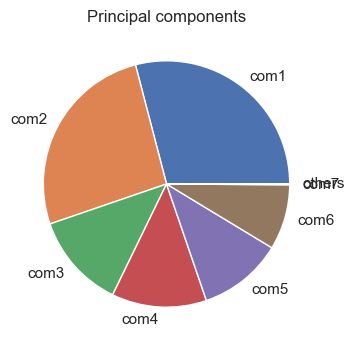

In [ ]:
# Plot the principal components in pie chart, and only keep the components that
# contains 95% information of original dataset.
threshold = 0.95
for_test = 0
order = 0
for index, ratio in enumerate(pca.explained_variance_ratio_):
    if threshold > for_test:
        for_test += ratio
    else:
        order = index + 1
        break

print(pca.explained_variance_ratio_[:order].sum())
com_col = ['com'+ str(i+1) for i in range(order)]
com_col.append('others')
com_value = [i for i in pca.explained_variance_ratio_[:order]]
com_value.append(1-pca.explained_variance_ratio_[:order].sum())
plt.figure(figsize=[4,4])
plt.pie(x = com_value, labels = com_col)
plt.title('Principal components')
plt.show()

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=1)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4453834, 8)
Number transactions y_train dataset:  (4453834,)
Number transactions X_test dataset:  (1908786, 8)
Number transactions y_test dataset:  (1908786,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)


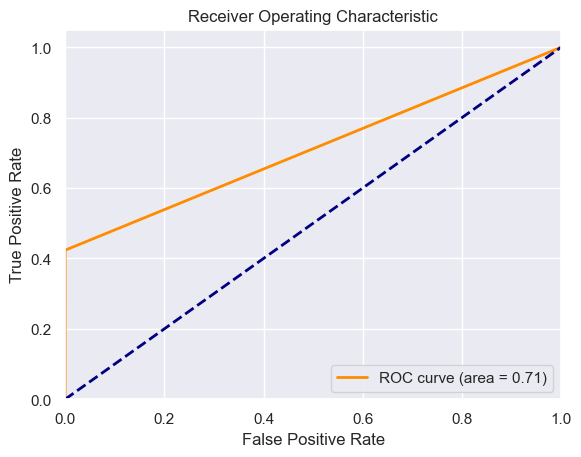

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate accuracy, recall, precision, and F1 score
acc1 = accuracy_score(y_test, predictions)
prec1 = precision_score(y_test, predictions)
rec1 = recall_score(y_test, predictions)
f11 = f1_score(y_test, predictions)

# Create a DataFrame to store the results
results_testset = pd.DataFrame([['Logistic Regression', acc1, rec1, prec1, f11]],
                               columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])



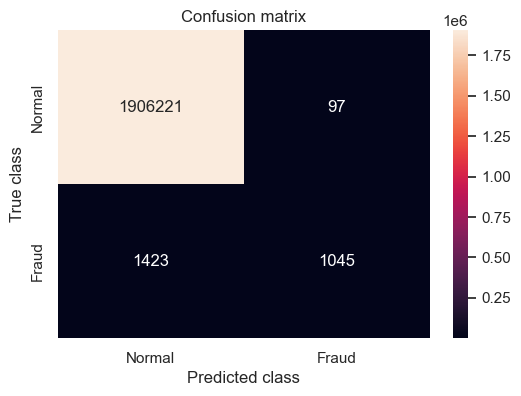

Logistic Regression: 1520
0.9992036823405034
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.92      0.42      0.58      2468

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 500x400 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions )
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (predictions  != y_test).sum()
# Run classification metrics
plt.figure(figsize=(5, 4))
print('{}: {}'.format("Logistic Regression", n_errors))
print(accuracy_score(y_test, predictions ))
print(classification_report(y_test, predictions ))

# Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [ ]:

acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred)
rec2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc2,'\tprecision:%0.4f'%prec2,'\trecall:%0.4f'%rec2,'\tF1-score:%0.4f'%f12)

accuracy:0.9997 	precision:0.9806 	recall:0.7800 	F1-score:0.8689


In [ ]:


model_results = pd.DataFrame([['Random Forest', acc2, rec2, prec2, f12]],
                            columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

results_testset = pd.concat([results_testset, model_results], ignore_index=True)



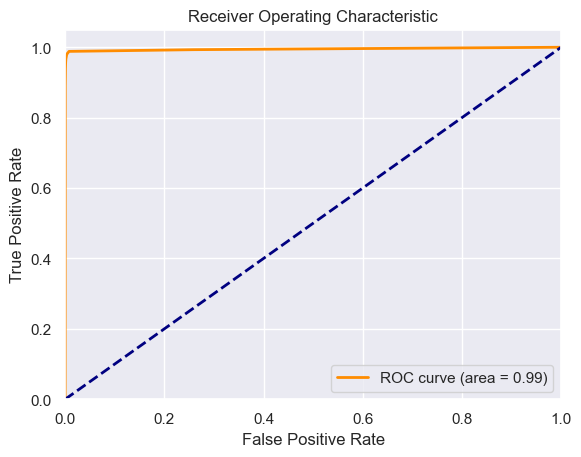

In [ ]:


# Assuming clf is a trained classifier that can provide probability scores
y_score = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


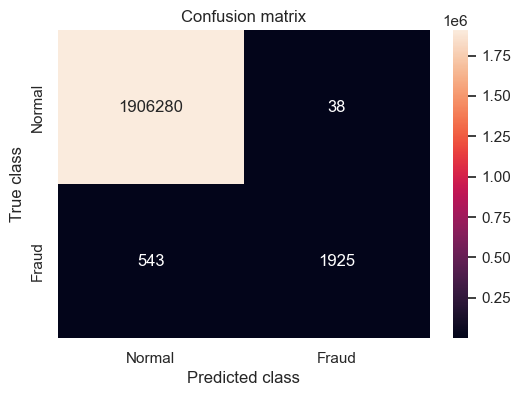

Random Forest: 581
0.9996956180525214
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.98      0.78      0.87      2468

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y_pred != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

In [ ]:
acc3 = accuracy_score(y_test, y_pred_dt)
prec3 = precision_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt)
f13 = f1_score(y_test, y_pred_dt)
print('accuracy:%0.4f'%acc3,'\tprecision:%0.4f'%prec3,'\trecall:%0.4f'%rec3,'\tF1-score:%0.4f'%f13)

accuracy:0.9997 	precision:0.8851 	recall:0.8772 	F1-score:0.8812


In [ ]:


model_results = pd.DataFrame([['Decision Tree', acc3, rec3, prec3, f13]],
                            columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

results_testset = pd.concat([results_testset, model_results], ignore_index=True)


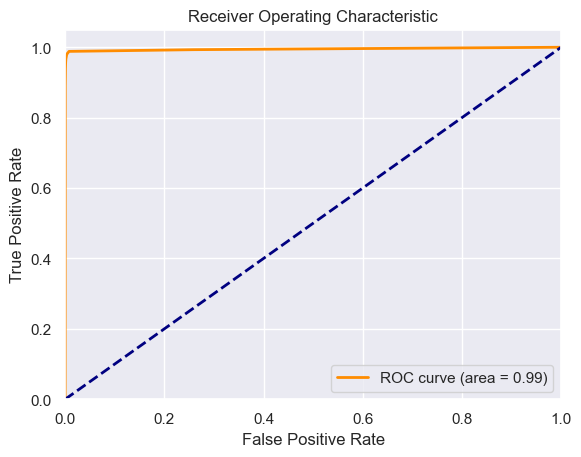

In [ ]:
# Assuming clf is a trained classifier that can provide probability scores
y_score = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

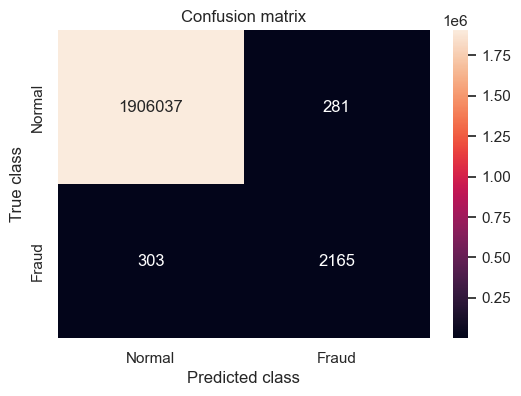

Decision Tree: 584
0.9996940463729302
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.89      0.88      0.88      2468

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_dt )
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y_pred_dt  != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Decision Tree", n_errors))
print(accuracy_score(y_test, y_pred_dt ))
print(classification_report(y_test,y_pred_dt ))

# Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian C0.
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y4= gnb.predict(X_test)

In [ ]:
acc4 = accuracy_score(y_test, y_pred_dt)
prec4 = precision_score(y_test, y_pred_dt)
rec4 = recall_score(y_test, y_pred_dt)
f14 = f1_score(y_test, y_pred_dt)
print('accuracy:%0.4f'%acc4,'\tprecision:%0.4f'%prec4,'\trecall:%0.4f'%rec4,'\tF1-score:%0.4f'%f14)

accuracy:0.9997 	precision:0.8851 	recall:0.8772 	F1-score:0.8812


In [ ]:

model_results = pd.DataFrame([['Naive Bayes', acc4, rec4, prec4, f14]],
                            columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

results_testset = pd.concat([results_testset, model_results], ignore_index=True)

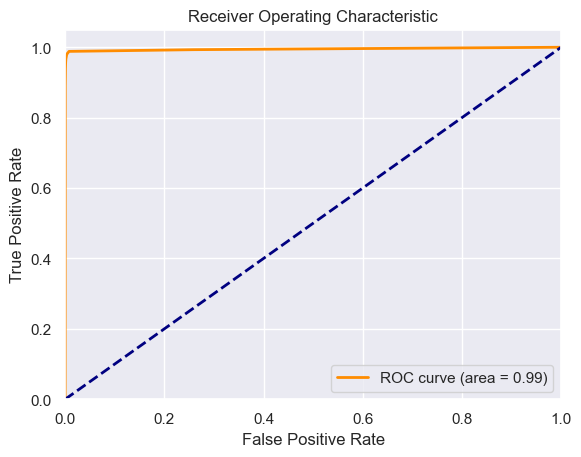

In [ ]:
y_score = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

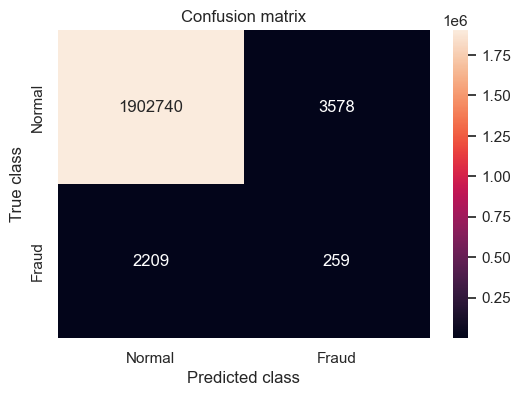

Naive Bayes: 5787
0.9969682300687452
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.07      0.10      0.08      2468

    accuracy                           1.00   1908786
   macro avg       0.53      0.55      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y4)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y4 != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Naive Bayes", n_errors))
print(accuracy_score(y_test, y4))
print(classification_report(y_test, y4))

In [ ]:
results_testset

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.999204,0.423420,0.915061,0.578947
1,Random Forest,0.999696,0.779984,0.980642,0.868878
2,Decision Tree,0.999694,0.877229,0.885119,0.881156
3,Naive Bayes,0.999694,0.877229,0.885119,0.881156


# XGBoost

In [ ]:


#Create a svm Classifier
clf2  =  XGBClassifier()

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y1 = clf2.predict(X_test)

In [ ]:
acc5 = accuracy_score(y_test, y1)
prec5 = precision_score(y_test, y1)
rec5 = recall_score(y_test, y1)
f15= f1_score(y_test, y1)
print('accuracy:%0.4f'%acc5,'\tprecision:%0.4f'%prec5,'\trecall:%0.4f'%rec5,'\tF1-score:%0.4f'%f15)

accuracy:0.9998 	precision:0.9613 	recall:0.8545 	F1-score:0.9048


In [ ]:
model_results = pd.DataFrame([['XG Boost', acc5, rec5, prec5, f15]],
                            columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

results_testset = pd.concat([results_testset, model_results], ignore_index=True)

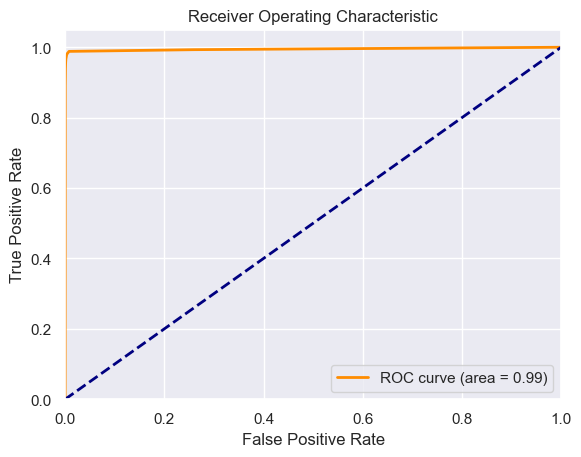

In [ ]:
y_score = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

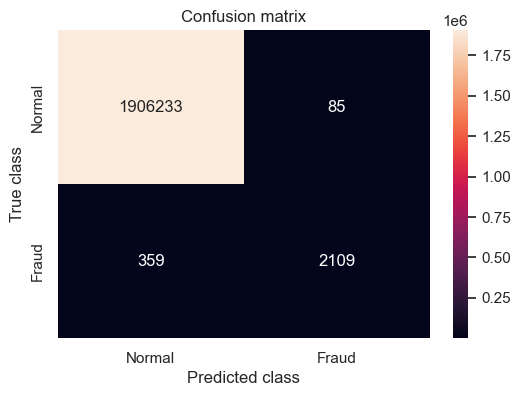

SVM: 444
0.9997673914205154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.96      0.85      0.90      2468

    accuracy                           1.00   1908786
   macro avg       0.98      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 900x700 with 0 Axes>

In [ ]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
n_errors = (y1 != y_test).sum()
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("SVM", n_errors))
print(accuracy_score(y_test, y1))
print(classification_report(y_test, y1))

In [ ]:
results_testset

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.999204,0.423420,0.915061,0.578947
1,Random Forest,0.999696,0.779984,0.980642,0.868878
2,Decision Tree,0.999694,0.877229,0.885119,0.881156
3,Naive Bayes,0.999694,0.877229,0.885119,0.881156
4,XG Boost,0.999767,0.854538,0.961258,0.904762


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

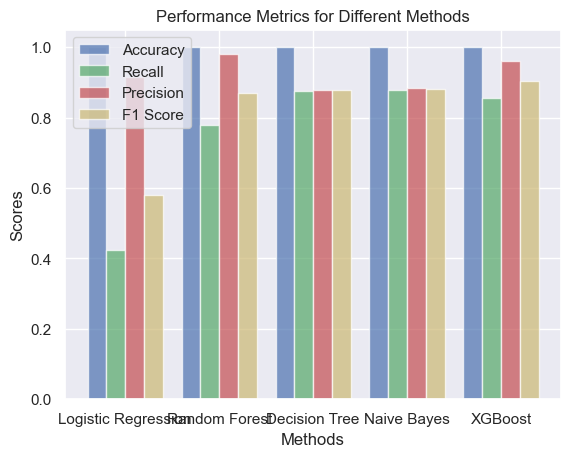

In [ ]:
import matplotlib.pyplot as plt

methods = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'XGBoost']
accuracy = [0.999204, 0.999696, 0.999683, 0.999694, 0.999767]
recall = [0.423420, 0.779579, 0.876418, 0.877229, 0.854538]
precision = [0.915061, 0.981633, 0.878197, 0.885119, 0.961258]
f1_score = [0.578947, 0.869015, 0.877307, 0.881156, 0.904762]

# Set the width of the bars
bar_width = 0.2

# Define the positions of bars on the x-axis
index = range(len(methods))

# Create subplots to display multiple metrics
fig, ax = plt.subplots()

# Plot bars for each metric
ax.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
ax.bar([i + bar_width for i in index], recall, bar_width, label='Recall', color='g', alpha=0.7)
ax.bar([i + 2*bar_width for i in index], precision, bar_width, label='Precision', color='r', alpha=0.7)
ax.bar([i + 3*bar_width for i in index], f1_score, bar_width, label='F1 Score', color='y', alpha=0.7)

# Set labels and title
ax.set_xlabel('Methods')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Methods')
ax.set_xticks([i + 1.5*bar_width for i in index])
ax.set_xticklabels(methods)
ax.legend()

# Show the plot
plt.show()
